<a href="https://colab.research.google.com/github/kshitij0209ag/Data-Scient-Project_11_FEB_2021/blob/main/Amazon_sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('amazon_vfl_reviews.csv')

df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...


In [51]:
df.shape

(2782, 5)

In [52]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [53]:
df['review'].isnull().sum()

4

In [54]:
df['name'].sample(n=3)

2521     Fastrack-Casual-Analog-Grey-Watch-NK3121SL02
2694                  Mysore-Sandal-Jasmine-Rose-Soap
301     Godrej-Security-Solutions-SEEC9060-Electronic
Name: name, dtype: object

In [55]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

            asin                             name       date  rating review
2248  B01GCETOCW               Tata-Tea-Gold-500g   3/3/2018       4    NaN
2258  B01GCETOCW               Tata-Tea-Gold-500g   3/3/2018       4    NaN
2631  B07J2MQNW3  Mysore-Sandal-Bathing-Soap-125g  5/22/2020       4    NaN
2641  B07J2MQNW3  Mysore-Sandal-Bathing-Soap-125g  5/22/2020       4    NaN


In [56]:
df.dropna(inplace=True)

In [57]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [58]:
df['brandName'] = df['name'].str.split('-').str[0]
df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

# we have to change the another chart

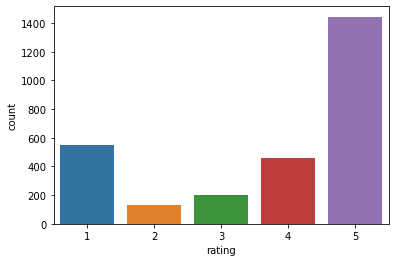

In [59]:
df.columns
sns.countplot(x='rating', data=df)

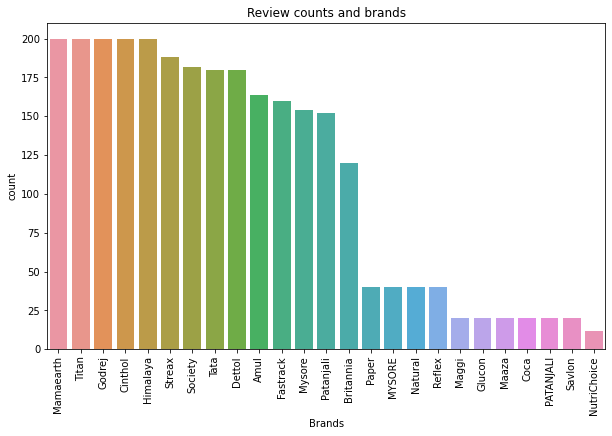

In [60]:
plt.figure(figsize = (10,6))
sns.barplot(df['brandName'].value_counts()
[:25].index,df['brandName'].value_counts()
[:25].values)
plt.title('Review counts and brands')
plt.xlabel('Brands')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [61]:
import string


In [62]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
#converting to lower case
df['clean_review_text']=df['review'].str.lower()
#removing punctuations
df['clean_review_text']=df['clean_review_text'].str.translate(str.maketrans('','',string.punctuation))
stopWords=stopwords.words('english')+['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']

def removeStopWords(stopWords, rvw_txt):
  newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
  return newtxt
df['clean_review_text'] = [removeStopWords(stopWords,x) 
for x in df['clean_review_text']]

In [64]:
df.head()

,asin,name,date,rating,review,brandName,clean_review_text
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,bought hair oil viewing many good comments pro...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,used mama earth newly launched onion oil twice...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...,Mamaearth,bad productmy hair falling increase muchi orde...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,product smells similar navarathna hair oil str...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,trying different onion oil hair hair healthy p...


In [65]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores = []
sentiment_score_flag = []
for text in df['clean_review_text']:
    sentimentResults = sentiment_model.polarity_scores(text)
    sentiment_score = sentimentResults["compound"]
    sentiment_scores.append(sentiment_score)
    if sentimentResults['compound'] >= 0.05:
        sentiment_score_flag.append('positive')
    elif sentimentResults['compound'] <= -0.05:
        sentiment_score_flag.append('negative')
    else:
        sentiment_score_flag.append('neutral')

df['scores'] = sentiment_scores
df['scoreStatus'] = sentiment_score_flag
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,asin,name,date,rating,review,brandName,clean_review_text,scores,scoreStatus
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,bought hair oil viewing many good comments pro...,0.8147,positive
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,used mama earth newly launched onion oil twice...,0.8689,positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...,Mamaearth,bad productmy hair falling increase muchi orde...,-0.6820,negative
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,product smells similar navarathna hair oil str...,-0.6124,negative
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,trying different onion oil hair hair healthy p...,0.9286,positive


In [90]:
df = df[df["scoreStatus"].str.contains("neutral") == True]


# df[df['scoreStatus']] == "neutral'


In [91]:
df.shape


(0, 9)

In [68]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


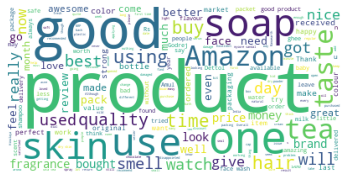

In [69]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='white').generate(' '.join(df['review']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


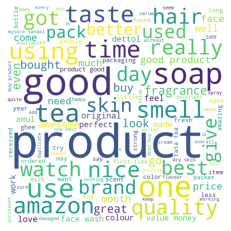

In [70]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(width=1000, height=1000, background_color='white',
                       min_font_size=20).generate(' '.join(df['clean_review_text']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


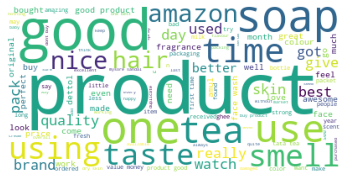

In [71]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='white').generate(
    ' '.join(df['clean_review_text']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


# TF and TF-IDF Vectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [73]:
tf = TfidfVectorizer()


In [74]:
x = tf.fit_transform(df['clean_review_text']).toarray()
print(x)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.70710678 0.70710678]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Bag of words

In [75]:
from sklearn.feature_extraction.text import CountVectorizer


In [76]:
features = CountVectorizer()
features.fit(df['clean_review_text'])


CountVectorizer()

In [77]:
bagofWords = features.transform(df['clean_review_text'])


# Representation of output [note]

In [78]:
print(bagofWords)

  (0, 318)	1
  (0, 404)	1
  (0, 735)	2
  (0, 742)	1
  (0, 754)	2
  (0, 835)	1
  (0, 867)	1
  (0, 952)	1
  (0, 1081)	1
  (0, 1111)	1
  (0, 1280)	1
  (0, 1691)	1
  (0, 1692)	1
  (0, 1769)	1
  (0, 1890)	1
  (0, 1962)	1
  (0, 2134)	1
  (0, 2141)	3
  (0, 2228)	1
  (0, 2244)	1
  (0, 2680)	1
  (0, 2889)	1
  (0, 2940)	2
  (0, 2961)	1
  (0, 3373)	3
  :	:
  (2773, 2018)	1
  (2773, 2709)	1
  (2773, 2838)	1
  (2773, 5002)	1
  (2774, 3744)	1
  (2774, 4540)	1
  (2775, 5547)	1
  (2775, 5548)	1
  (2776, 3815)	1
  (2776, 4786)	1
  (2777, 648)	1
  (2777, 1197)	1
  (2777, 1379)	1
  (2777, 1592)	1
  (2777, 1996)	1
  (2777, 2387)	2
  (2777, 2405)	1
  (2777, 2430)	1
  (2777, 2745)	1
  (2777, 3165)	2
  (2777, 4069)	1
  (2777, 4479)	1
  (2777, 4540)	1
  (2777, 4592)	1
  (2777, 4778)	2


In [79]:
df['clean_review_text'].shape

(2778,)

In [80]:
bagofWords.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# concatenation of two columns

In [81]:
# df = pd.concat(df.scoreStatus, df.scores)

pd.concat([df.scoreStatus, df.scores], axis=1)



,scoreStatus,scores
0,Neutral,0.8147
1,Neutral,0.8689
2,Neutral,-0.6820
3,Neutral,-0.6124
4,Neutral,0.9286
...,...,...
2777,Neutral,0.0000
2778,Neutral,0.0000
2779,Neutral,0.0000
2780,Neutral,0.5994


In [82]:
df['scoreStatus'] == 'negative'


0       False
1       False
2       False
3       False
4       False
        ...  
2777    False
2778    False
2779    False
2780    False
2781    False
Name: scoreStatus, Length: 2778, dtype: bool

In [83]:
negative_reviews = df[df['scoreStatus'] == 'negative']
negative_reviews

,asin,name,date,rating,review,brandName,clean_review_text,scores,scoreStatus


In [84]:
df.name.unique()

array(['Mamaearth-Onion-Growth-Control-Redensyl',
       'Mamaearth-Percent-Natural-Berry-Toothpaste',
       'Mamaearth-Natural-Turmeric-Saffron-brightning',
       'Mamaearth-Illuminate-Vitamin-Radiant-Turmeric',
       'Mamaearth-Blemishes-Pigmentation-Blemish-Mulberry',
       'Mamaearth-Face-Wash-100-ml',
       'Mamaearth-Moisturizing-Baby-Bathing-Oatmeal',
       'Godrej-Protekt-Master-Blaster-Handwash',
       'Godrej-No-1-Bathing-Soap-Lime',
       'Godrej-No-1-Bathing-Soap-Turmeric',
       'Godrej-Direct-Cool-Refrigerator-1905-PTDI',
       'Godrej-aer-Pocket-Bathroom-Fragrance',
       'Godrej-Security-Solutions-SEEC9060-Electronic',
       'Godrej-Matic-Spray-Violet-Valley',
       'Godrej-Security-Solutions-Goldilocks-Personal',
       'Godrej-ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Titan-Analog-Black-Dial-Watch-1805NM01',
       'Titan-Analog-White-Dial-Watch-NK1639SL03',
       'Titan-Karishma-Analog-Blue-Watch-1774SM01',
       'Titan-Karishma-Analog-Black-Wa

In [85]:
positive_reviews = df[df['scoreStatus'] == 'positive']
positive_reviews


,asin,name,date,rating,review,brandName,clean_review_text,scores,scoreStatus
